In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import geopandas
import plotly.express as px
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import imageio
import mapclassify
import matplotlib
import matplotlib.image as mpimg
import ast
import json
import numpy as np
import shapely.wkt
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib
pd.set_option('display.max_columns', None)
from six.moves import reduce
import scipy
from sklearn.metrics import r2_score
#scipy.stats.pearsonr
import scipy.stats as stats
plt.rcParams.update({'font.family': 'Arial'})
import matplotlib.colors as clr
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm
from sklearn.cluster import *
from sklearn.decomposition import PCA
from functools import reduce
import scipy.stats

import math
import sklearn
import sklearn.feature_extraction.text
from sklearn import cluster
from sklearn import metrics
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.decomposition
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.metrics import roc_auc_score
from shapely import wkt
#from mycolorpy import colorlist as mcp
import matplotlib.ticker as mtick
from scipy import stats
from textwrap import wrap
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#from mycolorpy import colorlist as mcp
from distinctipy import distinctipy

In [2]:
param_2018 = pd.read_csv(
    'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_2018/PSO_2018_6params_NYC_norm_28_PSO_15.csv')

param_2019 = pd.read_csv(
    'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_2019/PSO_2019_6params_NYC_norm_28_PSO_15.csv')

param_2020 = pd.read_csv(
    'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_2020/PSO_2020_6params_NYC_norm_28_PSO_15.csv')

In [3]:
cbgs = param_2018['cbg'].unique().tolist()
with open('data/1_data_for_extracting_information/nyc_cbgs.json') as f:
    cbg_data = json.load(f)
cbg_info_full = cbg_data['features']

shp_path = 'data/1_data_for_extracting_information/tl_2017_36_bg/tl_2017_36_bg.shp'
shp_df = geopandas.GeoDataFrame.from_file(shp_path,encoding = 'gb18030')
cbg_info = {}
cbg_id = shp_df['GEOID'].tolist()
cbg_geo = shp_df['geometry'].tolist()
for i in range(len(cbg_id)):
    if int(cbg_id[i]) in cbgs:
        cbg_info[cbg_id[i]] = cbg_geo[i]

In [4]:
clusters = geopandas.read_file(
    'data/4_analysis/census_info_with_kmeans_label.shp')
useful_cbgs = clusters['cbg'].tolist()

param_2018_good = param_2018[param_2018['cbg'].isin(useful_cbgs)].sort_values(by = 'cbg')

param_2019_good = param_2019[param_2019['cbg'].isin(useful_cbgs)].sort_values(by = 'cbg')

param_2020_good = param_2020[param_2020['cbg'].isin(useful_cbgs)].sort_values(by = 'cbg')

In [5]:
ses = ['med_ageE', 'bachelor_degree_25E', 'med_hh_incomeE', 'whiteE',
       'blackE', 'asianE', 'hispanicE']

In [6]:
variables = ['H_Area_of_store', 
       'R_Percentage_of_Visits_by_brand', 'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is', 'L_Demographic_similarity',
       'G_Distance_between_cbg_and_store']

In [7]:
for p in [param_2018_good, param_2019_good, param_2020_good]:
    for v in variables:
        p[v] = p[v].astype(float)

In [8]:
control_before = param_2018_good[['cbg'] + variables].copy()
control_before['treated'] = [0] * len(control_before)
control_before['time'] = [0] * len(control_before)

control_after = param_2019_good[['cbg'] + variables].copy()
control_after['treated'] = [0] * len(control_after)
control_after['time'] = [1] * len(control_after)

treat_before = param_2019_good[['cbg'] + variables].copy()
treat_before['treated'] = [1] * len(treat_before)
treat_before['time'] = [0] * len(treat_before)

treat_after = param_2020_good[['cbg'] + variables].copy()
treat_after['treated'] = [1] * len(treat_after)
treat_after['time'] = [1] * len(treat_after)

did = pd.concat([control_before, control_after, treat_before, treat_after])

did['did'] = did['treated'] * did['time']

did.to_csv(
    'data/4_analysis/did_general.csv', 
    index=False)

In [9]:
did_clusters = did.merge(clusters[['cbg', 'CL']])

In [10]:
for i in range(1, 6):
    did_clusters[did_clusters['CL'] == i].to_csv(
        'data/4_analysis/did_sub_data/did_CL_' + str(i) + '.csv', 
        index = False)

In [11]:
clusters.head()

,cbg,population,med_ageE,bachelor_d,med_hh_inc,whiteE,blackE,asianE,hispanicE,CL,geometry
0,360050245023,1886,28.9,0.042418,30500.0,0.154295,0.239130,0.000000,0.873807,2.0,"POLYGON ((-73.91542 40.85417, -73.91494 40.855..."
1,360050247002,1318,35.4,0.080425,44524.0,0.045524,0.523520,0.004552,0.502276,2.0,"POLYGON ((-73.92122 40.85469, -73.92096 40.855..."
2,360050253004,1222,26.6,0.044190,36250.0,0.094108,0.036825,0.000000,0.945172,2.0,"POLYGON ((-73.90707 40.85936, -73.90404 40.862..."
3,360050263005,1941,63.8,0.156620,12351.0,0.311180,0.220505,0.000000,0.459042,2.0,"POLYGON ((-73.90439 40.86590, -73.90236 40.868..."
4,360050265004,1191,28.2,0.073048,38099.0,0.028547,0.223342,0.073887,0.748950,2.0,"POLYGON ((-73.90194 40.86455, -73.90059 40.866..."


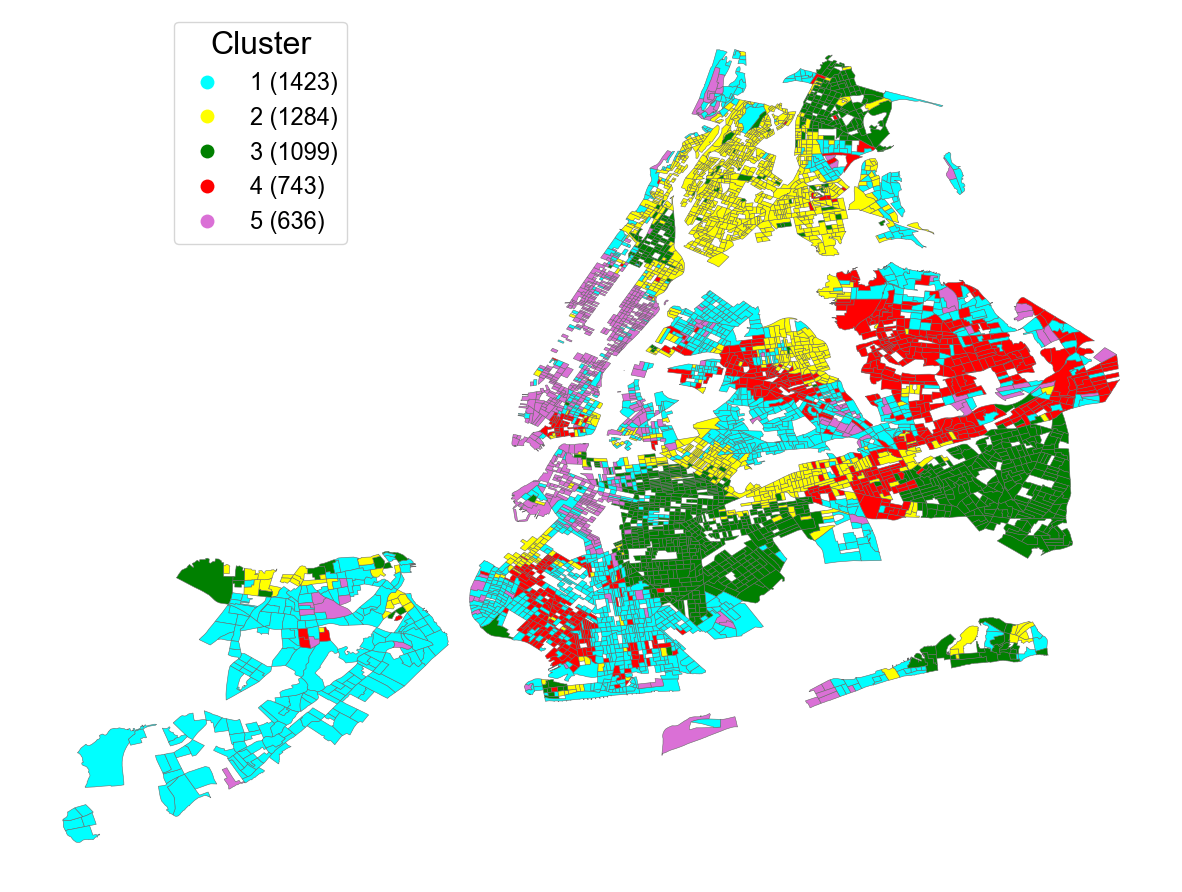

In [12]:
clusters_plot = clusters.copy().rename(columns = {'CL': 'Cluster'})
clusters_plot['Cluster'] = clusters_plot['Cluster'].astype(int)

legend_labels = []
for i in range(1, 6):
    legend_labels.append(str(i) + ' (' + str(clusters_plot['Cluster'].value_counts()[i]) + ')')

clusters_ax = clusters_plot.plot(column = 'Cluster', categorical = True,figsize = [15,15],
                        linewidth=.4, edgecolor='dimgrey', 
                        legend=True, 
                        # cmap = matplotlib.colors.ListedColormap(['deepskyblue', 'coral',
                        #                                          'yellowgreen', 'purple', 'yellow']),
                        #cmap = matplotlib.colors.ListedColormap(colors),
                        cmap = matplotlib.colors.ListedColormap(['cyan', 'yellow',
                                                                 'green', 'red', 'orchid']),
                        #cmap = 'gist_earth',
                        legend_kwds={'title': 'Cluster', 'bbox_to_anchor':(0.3, 1),
                                         'title_fontsize':23, 
                                         'fontsize':17})

clusters_ax.set_axis_off()
legend_here = clusters_ax.get_legend()
for i in range(5):
    legend_here.get_texts()[i].set_text(str(i+1) + ' (' + str(clusters_plot['Cluster'].value_counts()[i+1]) + ')')
plt.savefig('kmeans_cluster_geospatial_distribution.jpg', 
    dpi=300,bbox_inches='tight')
plt.show()

In [13]:
census_info_kmeans = pd.read_csv(
    'data/4_analysis/census_info_only_for_kmeans.csv')
census_info_kmeans 

,cbg,populationE,med_ageE,bachelor_degree_25E,med_hh_incomeE,whiteE,blackE,asianE,hispanicE,geometry
0,360050245023,1886,28.9,0.042418,30500.0,0.154295,0.239130,0.000000,0.873807,"POLYGON ((-73.915421 40.854175, -73.9149379999..."
1,360050247002,1318,35.4,0.080425,44524.0,0.045524,0.523520,0.004552,0.502276,"POLYGON ((-73.921215 40.854693, -73.920958 40...."
2,360050253004,1222,26.6,0.044190,36250.0,0.094108,0.036825,0.000000,0.945172,"POLYGON ((-73.907071 40.859362, -73.904038 40...."
3,360050263005,1941,63.8,0.156620,12351.0,0.311180,0.220505,0.000000,0.459042,"POLYGON ((-73.90439099999999 40.865905, -73.90..."
4,360050265004,1191,28.2,0.073048,38099.0,0.028547,0.223342,0.073887,0.748950,"POLYGON ((-73.901945 40.864553, -73.9005859999..."
...,...,...,...,...,...,...,...,...,...,...
5180,360850213002,987,27.0,0.095238,53445.0,0.470111,0.453901,0.025329,0.424519,"POLYGON ((-74.141488 40.633261999999995, -74.1..."
5181,360850036002,1087,41.6,0.249310,63563.0,0.625575,0.000000,0.300828,0.252070,"POLYGON ((-74.07897899999999 40.607077, -74.07..."
5182,360850040007,1854,33.8,0.151025,49703.0,0.199029,0.367853,0.160734,0.291802,"POLYGON ((-74.076955 40.620160999999996, -74.0..."
5183,360850006002,1995,55.4,0.306767,51964.0,0.696241,0.117293,0.112281,0.198997,"POLYGON ((-74.06613399999999 40.614089, -74.06..."


In [14]:
def process_single_ses_top(ses_var, prop):
    top_cbgs = census_info_kmeans[census_info_kmeans['cbg'].isin(census_info_kmeans.nlargest(
        int(len(census_info_kmeans)*prop), ses_var)['cbg'].tolist())]['cbg'].tolist()
    
    control_before = param_2018_good[param_2018_good['cbg'].isin(top_cbgs)][['cbg'] + variables].copy()
    control_before['treated'] = [0] * len(control_before)
    control_before['time'] = [0] * len(control_before)

    control_after = param_2019_good[param_2019_good['cbg'].isin(top_cbgs)][['cbg'] + variables].copy()
    control_after['treated'] = [0] * len(control_after)
    control_after['time'] = [1] * len(control_after)

    treat_before = param_2019_good[param_2019_good['cbg'].isin(top_cbgs)][['cbg'] + variables].copy()
    treat_before['treated'] = [1] * len(treat_before)
    treat_before['time'] = [0] * len(treat_before)

    treat_after = param_2020_good[param_2020_good['cbg'].isin(top_cbgs)][['cbg'] + variables].copy()
    treat_after['treated'] = [1] * len(treat_after)
    treat_after['time'] = [1] * len(treat_after)

    did_here = pd.concat([control_before, control_after, treat_before, treat_after])

    did_here['did'] = did_here['treated'] * did_here['time']
    
    did_here.to_csv(
        'data/4_analysis/did_sub_data/did_' + ses_var +'.csv', 
        index=False)
    return did_here

In [15]:
for s in ses:
    process_single_ses_top(s, 0.05)

In [16]:
did_data = ['general', 'CL_1', 'CL_2', 'CL_3', 'CL_4', 'CL_5', 'asianE', 'bachelor_degree_25E',
           'blackE', 'hispanicE', 'med_ageE', 'med_hh_incomeE', 'whiteE']
did_data_dict = {}
for d in did_data:
    did_data_dict[d] = 'data/4_analysis/did_sub_data/did_' + d + '.csv'

In [17]:
def process_one_data_did(data_name):
    ans = {'data' :[], 'variable': [], 'did_coef': [], 'if_significant': []}
    df_here = pd.read_csv(did_data_dict[data_name])
    X = df_here.iloc[:,-3:]
    #y = df_here.iloc[:,3]
    X_with_constant = sm.add_constant(X)
    for v in variables:
        ans['data'].append(data_name)
        ans['variable'].append(v)
        
        y = df_here[[v]]
        reg_temp = sm.OLS(y, X_with_constant)
        reg_fitted = reg_temp.fit()
        ans['did_coef'].append(reg_fitted.params['did'])
        pvalue_temp = reg_fitted.pvalues['did']
        if pvalue_temp <= 0.05:
            ans['if_significant'].append('Yes')
        else:
            ans['if_significant'].append('No')
    return pd.DataFrame(ans)

In [18]:
did_results_final = []
for k in did_data_dict.keys():
    did_results_final.append(process_one_data_did(k))

In [19]:
vars_definition = {'H_Area_of_store': 'Store area', 
       'R_Percentage_of_Visits_by_brand': 'Chain loyalty', 'J_POI_count_where_store_is': 'POI count',
       'K_POI_diversity_where_store_is': 'POI diversity', 'L_Demographic_similarity': 'Demographic similarity',
       'G_Distance_between_cbg_and_store':'CBG-Store Distance'}

In [20]:
did_value_for_plotting = pd.concat(did_results_final)
did_value_for_plotting['feature'] = did_value_for_plotting['variable'].apply(lambda x: vars_definition[x])

In [21]:
did_value_for_plotting

,data,variable,did_coef,if_significant,feature
0,general,H_Area_of_store,3.312166,Yes,Store area
1,general,R_Percentage_of_Visits_by_brand,2.953780,Yes,Chain loyalty
2,general,J_POI_count_where_store_is,1.119308,Yes,POI count
3,general,K_POI_diversity_where_store_is,0.812093,Yes,POI diversity
4,general,L_Demographic_similarity,0.126647,No,Demographic similarity
...,...,...,...,...,...
1,whiteE,R_Percentage_of_Visits_by_brand,1.935345,Yes,Chain loyalty
2,whiteE,J_POI_count_where_store_is,-0.119429,No,POI count
3,whiteE,K_POI_diversity_where_store_is,-0.016533,No,POI diversity
4,whiteE,L_Demographic_similarity,0.000569,No,Demographic similarity


In [22]:
community_interpretation = {'med_ageE': 'age', 'bachelor_degree_25E': 'education','med_hh_incomeE': 'income', 
                            'whiteE': 'White', 'blackE': 'African-American', 
                            'asianE': 'Asian','hispanicE': 'Hispanic/Latino'}

def get_interpretation(label_here):
    if label_here in ses:
        return community_interpretation[label_here]
    return label_here

did_value_for_plotting['data'] = did_value_for_plotting['data'].apply(lambda x: x.replace('CL_', 'Clustser '))
did_value_for_plotting['community'] = did_value_for_plotting['data'].apply(lambda x: get_interpretation(x).title())

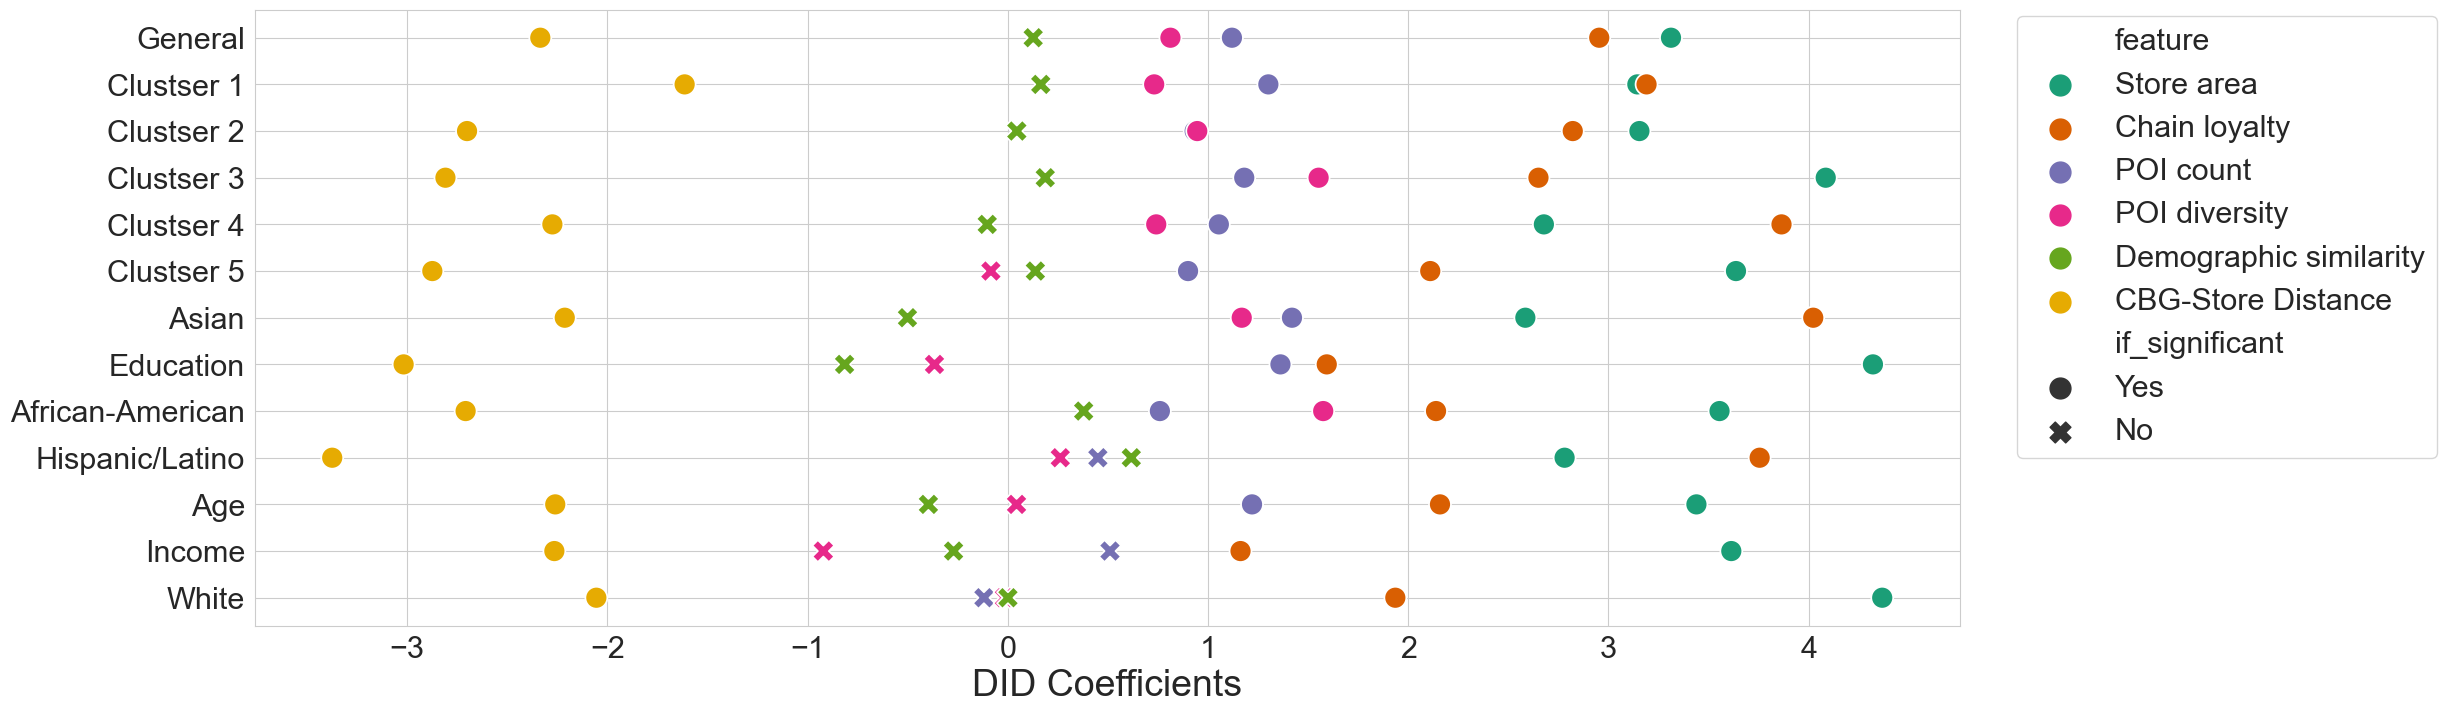

In [23]:
plt.figure(figsize=(22,8))
sns.set_style("whitegrid")
ax = sns.scatterplot(
    data=did_value_for_plotting,palette='Dark2',s=250,
    y="community", x="did_coef", hue="feature",style = 'if_significant',
)

plt.ylabel(None)
plt.xticks(size=22)
plt.yticks(size=22)
plt.xlabel('DID Coefficients', size = 27)
plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0.2,fontsize=22, markerscale = 2.5)

ax.set_axisbelow(True)

plt.savefig(
    'DID Results for Parameter Value Changes_all_subgroups.jpg', 
    dpi=300,bbox_inches='tight')

plt.show()